In [34]:
%load_ext autoreload
%autoreload 2

from metric_learn import Covariance
from visiprog.data import *
from visiprog.metric_learn import *
from visiprog.evaluate import *
%matplotlib inline
import matplotlib
import numpy as np
from visiprog.metric_learn.fda_visiprog import LFDA_VISIPROG

from IPython.display import Image, display

np.set_printoptions(precision=2)

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
raw_feature = read_raw_feature()
print(raw_feature.shape)
material_label = read_material_label()

(5245, 82)


# Baseline approach
STSIM-M approach, no training

In [ ]:
# cov = Covariance()
# cov.fit(raw_feature)
# X_STSIMM = cov.transform(raw_feature)

In [ ]:
# np.savetxt('STSIM_M.csv', M, fmt='%.2f', delimiter=',')
# res = leave_one_sample_out(X_STSIMM)
# print(res['accuracy'])

# Fisher linear discriminant approach

Exact solution, however trained with semantic labels ...

In [5]:
model = LFDA()
model.fit(raw_feature, material_label)
X_fisher = model.transform(raw_feature)

In [6]:
# np.savetxt('FDA_semantic.csv', M, fmt='%.2f', delimiter=',')
res_fda = leave_one_sample_out(X_fisher, material_label)
print(res_fda['accuracy'])

0.989513822688


In [26]:
n_list = range(1,20)

In [37]:
representative = []

for n in n_list:
    print(n)
    res = kmean_subclass(X_fisher, material_label, X_fisher, material_label, n)
    representative.append(res['accuracy'])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


# Train using ViSiProg label

In [28]:
groups, _ = read_VSP_group(pappas_only=False)

In [29]:
N = raw_feature.shape[0]
visiprog_label = get_VSP_label(groups, N)

In [30]:
model = LFDA_VISIPROG()
model.fit(raw_feature, visiprog_label)
X_vsp = model.transform(raw_feature)

In [31]:
res_vsp = leave_one_sample_out(X_vsp, material_label)
print(res_vsp['accuracy'])

0.99180171592


In [36]:
representative_VSP = []

for n in n_list:
    print(n)
    res = kmean_subclass(X_vsp, material_label, X_vsp, material_label, n)
    representative_VSP.append(res['accuracy'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


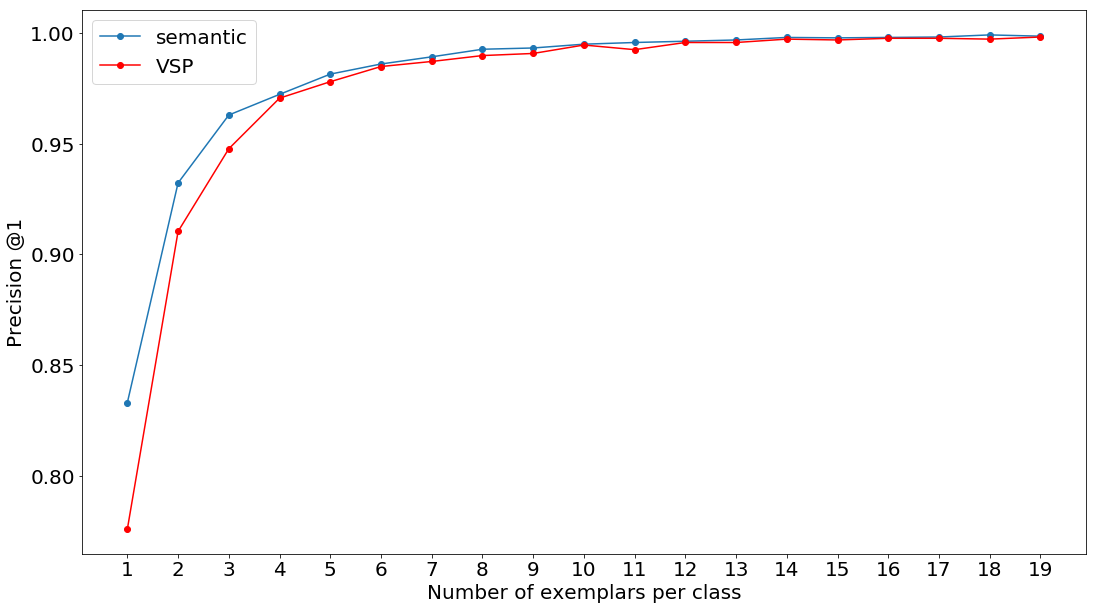

In [44]:
fig = plt.gcf()

matplotlib.rcParams.update({'font.size': 20})

fig.set_size_inches(18, 10)
plt.plot(n_list,representative,'-o', label='semantic')
plt.plot(n_list,representative_VSP, '-ro', label='VSP')

plt.xticks(n_list)


plt.ylabel('Precision @1')
plt.xlabel('Number of exemplars per class')

plt.legend()

fig.savefig('thrasos/exemplars_fixed_k.pdf')
fig.savefig('thrasos/exemplars_fixed_k.eps', dpi=1200)